<a href="https://colab.research.google.com/github/ardabyr/DataScience/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


train = pd.read_json("train.json", orient='records')
test = pd.read_json("test.json", orient='records')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
train['cuisine'].value_counts()

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

In [ ]:
top_ingredients = train['ingredients'].str.split(',').explode().value_counts().head(20)
print(top_ingredients)

Series([], Name: count, dtype: int64)


In [ ]:
df = train

Определение наиболее часто встречающихся ингредиентов

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()


formatted_ingredients = []
for ingredients in df['ingredients']:
    formatted_ingredients.append(' '.join(ingredients).lower())


X = vectorizer.fit_transform(formatted_ingredients)


features = vectorizer.get_feature_names_out()


ingredient_counts = pd.DataFrame({'ingredient': features, 'count': np.asarray(X.sum(axis=0)).ravel()})


ingredient_counts.sort_values('count', ascending=False).head(10)


,ingredient,count
1998,pepper,25742
2349,salt,24462
1860,oil,23344
1094,garlic,18941
1204,ground,18271
1044,fresh,17853
2374,sauce,13129
2647,sugar,12493
1873,onions,12341
522,cheese,11776


In [ ]:

X = X.toarray()

Разбиение рецептов на два кластера с помощью KMeans

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0)


kmeans.fit(X)


labels = kmeans.labels_


recipes = pd.DataFrame(df['ingredients'])


for cluster_id in range(2):
    recipes = df[labels == cluster_id]
    print(f'Кластер {cluster_id}')
    print(recipes['cuisine'].head())
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Кластер 0
1    southern_us
2       filipino
4         indian
6        spanish
8        mexican
Name: cuisine, dtype: object

Кластер 1
0        greek
3       indian
5     jamaican
7      italian
15      indian
Name: cuisine, dtype: object



Визуализация разбиения с помощью облаков слов

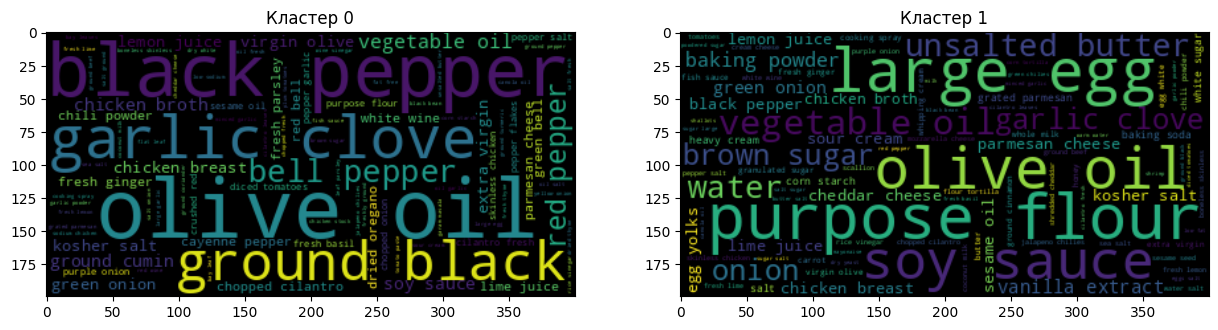

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordclouds = []
for cluster_id in range(2):
    recipes = df[labels == cluster_id]
    text = ' '.join(' '.join(ingredients) for ingredients in recipes['ingredients'].tolist())  # Объединяем все строки в одну строку
    wordcloud = WordCloud().generate(text)
    wordclouds.append(wordcloud)


fig, axs = plt.subplots(1, 2, figsize=(15, 15))
for i, wordcloud in enumerate(wordclouds):
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Кластер {i}')
plt.show()


Указание другого количества кластеров

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=0)


kmeans.fit(X)


labels = kmeans.labels_


for cluster_id in range(3):
    recipes = df[labels == cluster_id]
    print(f'Кластер {cluster_id}')
    print(recipes['cuisine'].head())
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Кластер 0
2       filipino
11       chinese
19    vietnamese
20          thai
23       chinese
Name: cuisine, dtype: object

Кластер 1
1    southern_us
4         indian
6        spanish
8        mexican
9        italian
Name: cuisine, dtype: object

Кластер 2
0        greek
3       indian
5     jamaican
7      italian
15      indian
Name: cuisine, dtype: object



Использование других алгоритмов кластеризации

In [ ]:
from sklearn.cluster import DBSCAN, OPTICS


algorithms = [
     ('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
     ("OPTICS", OPTICS(min_samples=5, max_eps=0.5))
]


for name, algorithm in algorithms:
    algorithm.fit(X)
    labels = algorithm.labels_


    for cluster_id in range(2):
        recipes = df[labels == cluster_id]
        print(f'{name}, Кластер {cluster_id}')
        print(recipes['cuisine'].head())
        print()


DBSCAN, Кластер 0
5343     french
9511     french
14517    french
15938    french
36546    french
Name: cuisine, dtype: object

DBSCAN, Кластер 1
7668     southern_us
13129    southern_us
16897    southern_us
20793    southern_us
29769    southern_us
Name: cuisine, dtype: object

OPTICS, Кластер 0
5343     french
9511     french
14517    french
15938    french
36546    french
Name: cuisine, dtype: object

OPTICS, Кластер 1
7668     southern_us
13129    southern_us
16897    southern_us
20793    southern_us
29769    southern_us
Name: cuisine, dtype: object



Оценка качества кластеризации с помощью коэффициента силуэта

In [ ]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
for name, algorithm in algorithms:
    silhouette_scores.append((name, silhouette_score(X, algorithm.labels_)))


silhouette_scores.sort(key=lambda x: x[1], reverse=True)


for name, score in silhouette_scores:
    print(f'{name}: {score}')


DBSCAN: -0.17079446284216623
OPTICS: -0.17079446284216623


 Оценка качества кластеризации с учетом истинной метки

In [ ]:

df['cuisine'] = df['cuisine'].astype('category')


df['cuisine_encoded'] = df['cuisine'].cat.codes


silhouette_score_kmeans_cuisine = silhouette_score(X, df['cuisine_encoded'])


print(f'Коэффициент силуэта для KMeans с учетом истинной метки: {silhouette_score_kmeans_cuisine}')

Коэффициент силуэта для KMeans с учетом истинной метки: -0.03223519780184288


Визуализация качества кластеризации

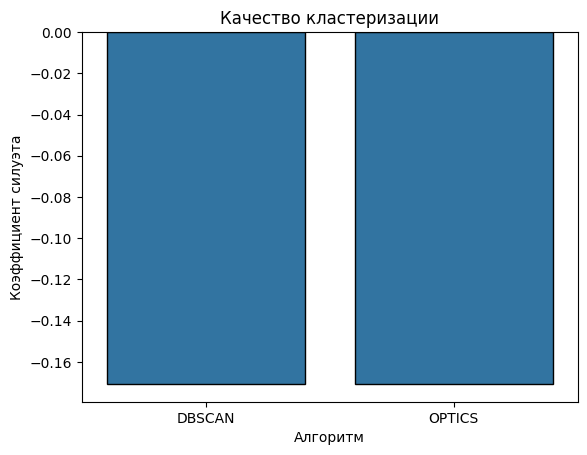

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['Алгоритм', 'Коэффициент силуэта'])


ax = sns.barplot(data=silhouette_scores_df, x='Алгоритм', y='Коэффициент силуэта', edgecolor='black')
ax.set_title('Качество кластеризации')
ax.set_xlabel('Алгоритм')
ax.set_ylabel('Коэффициент силуэта')


plt.show()
